<b>This notebook divide a single mailing list corpus into threads.</b> 

What it does:
-identifies the more participated threads
-identifies the long lasting threads
-export each thread's emails into seperate .csv files, setting thresholds of participation and duration

Parameters to set options:
-set a single URL related to a mailing list, setting the 'url' variable
-it exports files in the file path specified in the variable ‘path’
-you can set a threshold of participation and of duration for the threads to export, by setting 'min_participation' and 'min_duration' variables

In [6]:
%matplotlib inline
from bigbang.archive import Archive
from bigbang.archive import load as load_archive
from bigbang.thread import Thread
from bigbang.thread import Node
from bigbang.utils import remove_quoted
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import csv
from collections import defaultdict
import os


First, collect data from a public email archive.

In [31]:
#Insert a list of archive names
archives_names = ["ietf"]

cwd = os.getcwd()  

archives_paths = list()
for archive_name in archives_names:
    archives_paths.append('../../archives/'+archive_name+'.csv')
    

archives_list = [load_archive(archive_path).data for archive_path in archives_paths]
    
archives = Archive(pd.concat(archives_list))

archives_data = archives.data

IOError: File ../../archives/ietf.csv does not exist

Let's check the number of threads in this mailing list corpus

In [9]:
print len(archives.get_threads())

885


We can  plot the number of people participating in each thread.

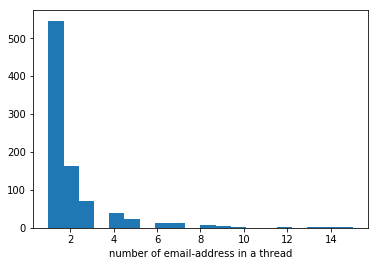

In [10]:
n_people = [t.get_num_people() for t in archives.get_threads()]

plt.hist(n_people, bins = 20)
plt.xlabel('number of email-address in a thread')
plt.show()

The *duration* of a thread is the amount of elapsed time between its first and last message. 

Let's plot the number of threads per each number of days of duration


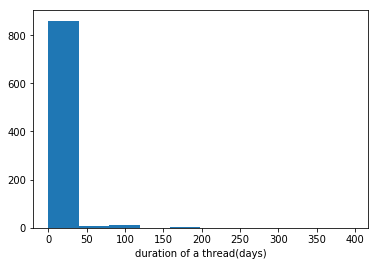

In [29]:
duration = [t.get_duration().days for t in archives.get_threads()]

plt.hist(duration, bins = (10))
plt.xlabel('duration of a thread(days)')
plt.show()

Let's take a look at the largest threads!

In [30]:
#set how many threads subjects you want to display
n_top = 5

threads_emailcount = defaultdict(int)
for thread in archives.get_threads():
    threads_emailcount[thread] = thread.get_num_messages()

for thread, count in sorted(threads_emailcount.iteritems(), reverse = True, key = lambda (k,v):(v,k))[:n_top]:
    try:print thread.get_root().data['Subject'] +'  ('+str(count)+' emails)'
    except: pass

[6lo] draft-chairs-6lo-dispatch-iana-registry-00.txt  (51 emails)
[6lo] Comments needed for Security Bootstrapping of IEEE 802.15.4 based Internet of Things  (43 emails)
[6lo] WG Review: IPv6 over Networks of Resource-constrained Nodes (6lo)  (40 emails)
[6lo] Request for Ethertype for 6lowpan-encoded IPv6  (33 emails)


Export the content of each thread into a .csv file (named: thread_1.csv, thread2.csv, ...).

You can set a minimum level of participation and duration, based on the previous analyses

In [62]:
#Insert the participation threshold (number of people)
#(for no threeshold: 'min_participation = 0') 
min_participation = 0

#Insert the duration threshold (number of days)
#(for no threeshold: 'min_duration = 0')
min_duration = 0

i = 0
for thread in arx.get_threads():
    if thread.get_num_people() >= min_participation and thread.get_duration().days >= min_duration:
            i += 1
            f = open(cwd+'/thread_'+str(i)+'.csv', "wb")
            f_w = csv.writer(f)
            f_w.writerow(thread.get_content())
            f.close()